# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import scipy.stats as stats

# Import CSV file 
df = pd.read_csv('data/human_body_temperature.csv')
# Print DF 
df

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0
5,99.2,M,83.0
6,98.0,M,71.0
7,98.8,M,78.0
8,98.4,F,84.0
9,98.6,F,86.0


In [3]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


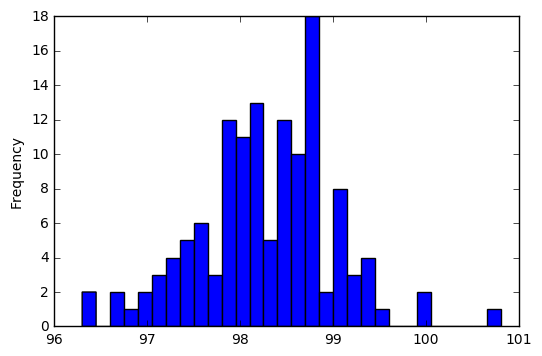

In [4]:
# Plot Temperature to show it follows normal distribution 
df['temperature'].plot(kind='hist',stacked=True, bins=30)
plt.show()

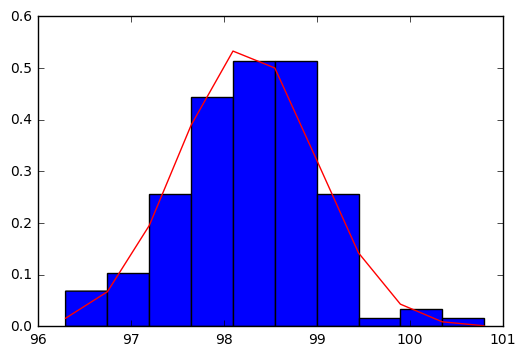

In [5]:
# Since there are non zero values, Calcuate mean 
# Calc Mean and Std Dev for the Temperature 
n, bins, patches = plt.hist(df.temperature, 10, normed=1)
temp_mu = df['temperature'].mean()
temp_sigma = df['temperature'].std()
plt.plot(bins, mlab.normpdf(bins, temp_mu, temp_sigma),color='r')
plt.show()      

In [6]:
# Using SciPy Librabry see if the data is Normal distribution
# If the P-Value from the data is greater than 0.05, we can't reject the null 
# Hypothesis (Data is normal)
stats.normaltest(df['temperature'])

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

# The P-value for the Temperature data is 0.25 which is >= 0.05 (5%) 
# Signification level, so we can't reject the Null Hypothesis  #(Data is Normal), So Temperature data is Normally distributed 

In [7]:
# Is the sample size large? Are the observations independent?
# Remember that this is a condition for the CLT, and 
#hence the statistical tests we are using, to apply.

# The sample size is 130 which is > 30, Yes the sample size is large for a  Normal distribution. 
# Yes, the sample observations are independent, They are randomly selected.  


In [8]:

# Would you use a one-sample or two-sample test? Why?
# In this situation, is it appropriate to use the  t or  z statistic?
# Now try using the other test. How is the result be different? Why?

In [9]:
# Is the true population mean really 98.6 degrees F?

In [10]:
# Using CLT, SE 
# mu(p) = 98.6, mu(s) = temp_mu = 98.24  
# Standard Error = SE = s/sqrt(n)
std_error = temp_sigma /((130)**0.5)

# Using Z-Test (mu(s)-mu(p))/std_error 
Z_Test = round(float((98.249231 - 98.6)/std_error),3)
Z_Test


-5.455

In [11]:
# since we are not interested in the direction, Use 2 - sided test 
p = stats.norm.sf(abs(Z_Test))*2
p

4.897284547948154e-08

# P- Value is less than 0.05, we can reject null hypothesis that the mean Temperature of the true population is not = 98.6 deg.F 

In [12]:

#At what temperature should we consider someone's temperature to be "abnormal"?
# Start by computing the margin of error and confidence interval.

In [13]:
# Sample_mean +/- (Confidence Level Z value) * Standard Error.
# Assuming 95% CI, Z value = 1.96 
CI_Limit = 1.96*std_error
CI = (temp_mu - CI_Limit, temp_mu + CI_Limit)
CI

(98.12319411222852, 98.37526742623304)

# With 95% Confidence level, we can says any mean temperature outside 95.12 and 95.37 is abnormal

In [14]:
#Is there a significant difference between males and females 
# in normal temperature?

In [15]:
# Get data for male and female in separate data frames 
males = df[df.gender == 'M']['temperature']
males.describe()

count    65.000000
mean     98.104615
std       0.698756
min      96.300000
25%      97.600000
50%      98.100000
75%      98.600000
max      99.500000
Name: temperature, dtype: float64

In [20]:
females = df[df.gender == 'F']['temperature']
females.describe()

count     65.000000
mean      98.393846
std        0.743488
min       96.400000
25%       98.000000
50%       98.400000
75%       98.800000
max      100.800000
Name: temperature, dtype: float64

In [28]:
# Calcuate Mean & Std Deviation for Male & Female 
meanMale = males.mean()
stdDevMale = males.std()
print("Male:",meanMale, stdDevMale)
meanFemale = females.mean()
stdDevFemale = females.std()
print("Female:",meanFemale, stdDevFemale)
MvsF_std_error = ((stdDevMale**2/((len(males)))**0.5))+((stdDevFemale**2 /((len(females)))**0.5))
print (MvsF_std_error)

Male: 98.1046153846154 0.6987557623265908
Female: 98.39384615384613 0.7434877527313665
0.12912433295324144


In [29]:
MvsF_Z = (meanMale - meanFemale)/MvsF_std_error
print (MvsF_Z)
MvsF_PValue = stats.norm.sf(abs(MvsF_Z))*2# using two-sided test
print (MvsF_PValue)

-2.239940084224585
0.0250948128969


# Since the P Value < 0.05 we can reject the Null Hypothesis, # H0: Female Mean Temperature is Same as Male Mean Temperature 

# Mean temperature for male and female are not same @ 95% CI 